In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo dữ liệu

In [68]:
df = pd.read_csv('/content/drive/MyDrive/khdl/Luxury watch.csv')
print(df.head())

       Brand       Model    Case Material   Strap Material Movement Type  \
0      Rolex  Submariner  Stainless Steel  Stainless Steel     Automatic   
1      Omega   Seamaster         Titanium           Rubber     Automatic   
2  Tag Heuer     Carrera  Stainless Steel          Leather     Automatic   
3  Breitling   Navitimer  Stainless Steel  Stainless Steel     Automatic   
4    Cartier   Tank Solo  Stainless Steel          Leather        Quartz   

  Water Resistance  Case Diameter (mm)  Case Thickness (mm)  Band Width (mm)  \
0       300 meters                40.0                13.00             20.0   
1       600 meters                43.5                14.47             21.0   
2       100 meters                41.0                13.00             20.0   
3        30 meters                43.0                14.25             22.0   
4        30 meters                31.0                 6.05             20.0   

  Dial Color Crystal Material Complications Power Reserve Pric

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


# Data Normalization

## Optimize column names

In [70]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)", "", regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    object 
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


## Data Preprocessing


### Data cleaning
- Xóa bỏ đơn vị
- Chuyển đổi kiểu dữ liệu
- Loại bỏ ký tự không mong muốn

In [71]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    object 
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    float64
dtypes: float64(4), object(10)
memory usage: 55.6+ KB


In [72]:
df['Water Resistance'] = df['Water Resistance'].str.replace(' meters', '', regex=False).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    float64
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    float64
dtypes: float64(5), object(9)
memory usage: 55.6+ KB


In [73]:
df['Power Reserve'].unique()

array(['48 hours', '60 hours', '42 hours', '70 hours', nan, '45 hours',
       '50 hours', '270 days', '38 hours', '80 hours', '64 hours',
       '40 hours', '56 hours', '4,200', '120 hours', '68 hours',
       '54 hours', '46 hours', '72 hours', '44 hours', '210 days',
       '65 hours', '43 hours', '41 hours', '55 hours', '168 hours'],
      dtype=object)

In [74]:
df['Power Reserve'].value_counts()

,count
Power Reserve,
60 hours,82
42 hours,55
70 hours,50
50 hours,40
72 hours,38
120 hours,30
45 hours,29
48 hours,27
38 hours,27


In [75]:
print(df['Power Reserve'].isna().sum())

14


In [76]:
df['Power Reserve'] = df['Power Reserve'].apply(lambda x:
    float(x.replace(' days', '').strip().replace(',', '')) * 24 if isinstance(x, str) and 'days' in x
    else float(x.replace(' hours', '').strip().replace(',', '')) if isinstance(x, str)
    else x)
print(df['Power Reserve'].isna().sum())

14


In [77]:
df['Power Reserve'].unique()

array([  48.,   60.,   42.,   70.,   nan,   45.,   50., 6480.,   38.,
         80.,   64.,   40.,   56., 4200.,  120.,   68.,   54.,   46.,
         72.,   44., 5040.,   65.,   43.,   41.,   55.,  168.])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    float64
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    float64
 13  Price             506 non-null    float64
dtypes: float64(6), object(8)
memory usage: 55.6+ KB


### Handling Invalid Values

In [79]:
df[df['Complications'].isna()]

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,2800.0
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30.0,42.9,9.20,20.0,Black,Sapphire,NaN,45.0,5500.0
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100.0,38.0,9.80,20.0,Black,Sapphire,NaN,80.0,495.0
14,Breguet,Classique,18k White Gold,Leather,Manual,30.0,38.0,8.65,20.0,Silver,Sapphire,NaN,40.0,16000.0
19,Panerai,Luminor Base Logo,Stainless Steel,Leather,Manual,100.0,44.0,10.50,22.0,Black,Sapphire,NaN,56.0,3900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Girard-Perregaux,Laureato,Stainless Steel,Stainless Steel,Automatic,100.0,42.0,10.88,25.0,Blue,Sapphire,NaN,54.0,7500.0
485,Jaquet Droz,Grande Seconde,Stainless Steel,Leather,Automatic,30.0,43.0,11.48,22.0,White,Sapphire,NaN,68.0,8500.0
491,IWC,Portugieser,Stainless Steel,Leather,Automatic,30.0,42.3,14.20,22.0,Blue,Sapphire,NaN,60.0,9100.0
497,Tudor,Black Bay,Stainless Steel,Leather,Automatic,200.0,41.0,14.75,22.0,Black,Sapphire,NaN,70.0,3800.0


In [80]:
df['Complications'] = df['Complications'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    float64
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     507 non-null    object 
 12  Power Reserve     493 non-null    float64
 13  Price             506 non-null    float64
dtypes: float64(6), object(8)
memory usage: 55.6+ KB


### Group Similar Categories

In [81]:
print(df['Case Material'].value_counts())

Case Material
Stainless Steel           404
Titanium                   37
Rose Gold                  12
18k Rose Gold              10
Ceramic                     9
White Gold                  9
18k White Gold              7
18K White Gold              5
18K Rose Gold               3
Carbon Fiber                3
18K Yellow Gold             2
German Submarine Steel      1
High-Tech Ceramic           1
Bronze                      1
Yellow Gold                 1
18k King Gold               1
18k Yellow Gold             1
Name: count, dtype: int64


In [82]:
df['Case Material'] = df['Case Material'].str.lower()

def normalize_case_material(x):
    if 'rose gold' in x or 'king gold' in x:
        return 'Rose Gold'
    elif 'white gold' in x:
        return 'White Gold'
    elif 'yellow gold' in x:
        return 'Yellow Gold'
    elif 'steel' in x:
        return 'Stainless Steel'
    elif 'titanium' in x:
        return 'Titanium'
    elif 'ceramic' in x:
        return 'Ceramic'
    elif 'carbon' in x:
        return 'Carbon Fiber'
    elif 'bronze' in x:
        return 'Bronze'
    else:
        return x.title()

df['Case Material'] = df['Case Material'].apply(normalize_case_material)

print(df['Case Material'].value_counts())

Case Material
Stainless Steel    405
Titanium            37
Rose Gold           26
White Gold          21
Ceramic             10
Yellow Gold          4
Carbon Fiber         3
Bronze               1
Name: count, dtype: int64


In [83]:
df['Strap Material'].value_counts()

,count
Strap Material,
Leather,224
Stainless Steel,166
Rubber,74
Fabric,11
Canvas,10
Silicone,5
NATO Strap,4
Jubilee Bracelet,3
Jubilee,2


In [84]:
df['Strap Material'] = df['Strap Material'].str.lower()

def normalize_strap_material(x):
    if 'leather' in x:
        return 'Leather'
    elif 'steel' in x:
        return 'Steel'
    elif 'rubber' in x:
        return 'Rubber'
    elif 'fabric' in x:
        return 'Fabric'
    elif 'canvas' in x:
        return 'Canvas'
    elif 'nato' in x:
        return 'Nato'
    elif 'jubilee' in x:
        return 'Jubilee'
    elif 'alligator' in x:
        return 'Alligator'
    elif 'rose gold' in x:
        return 'Rose Gold'
    elif 'titanium' in x:
        return 'Titanium'
    elif 'Textile' in x:
        return 'Textile'
    else:
        return x.title()

df['Strap Material'] = df['Strap Material'].apply(normalize_strap_material)

print(df['Strap Material'].value_counts())

Strap Material
Leather      224
Steel        166
Rubber        74
Fabric        11
Canvas        10
Nato           5
Jubilee        5
Silicone       5
Titanium       2
Alligator      2
Rose Gold      2
Textile        1
Name: count, dtype: int64


In [85]:
df['Movement Type'].value_counts()

,count
Movement Type,
Automatic,442
Manual,51
Quartz,12
Eco-Drive,2


In [86]:
df['Dial Color'].value_counts()

,count
Dial Color,
Black,217
Blue,136
Silver,118
White,33
Ivory,1
Champagne,1
Grey,1


In [87]:
df['Crystal Material'].value_counts()

,count
Crystal Material,
Sapphire,489
Hesalite,13
Hardlex,3
Mineral,2


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    float64
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     507 non-null    object 
 12  Power Reserve     493 non-null    float64
 13  Price             506 non-null    float64
dtypes: float64(6), object(8)
memory usage: 55.6+ KB


In [89]:
category_col = ['Case Material', 'Strap Material', 'Movement Type', 'Dial Color', 'Crystal Material']
df[category_col] = df[category_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             507 non-null    object  
 1   Model             507 non-null    object  
 2   Case Material     507 non-null    category
 3   Strap Material    507 non-null    category
 4   Movement Type     507 non-null    category
 5   Water Resistance  507 non-null    float64 
 6   Case Diameter     507 non-null    float64 
 7   Case Thickness    507 non-null    float64 
 8   Band Width        507 non-null    float64 
 9   Dial Color        507 non-null    category
 10  Crystal Material  507 non-null    category
 11  Complications     507 non-null    object  
 12  Power Reserve     493 non-null    float64 
 13  Price             506 non-null    float64 
dtypes: category(5), float64(6), object(3)
memory usage: 39.7+ KB


### Fill missing values

In [90]:
df['Power Reserve'] = df['Power Reserve'].fillna(df['Power Reserve'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             507 non-null    object  
 1   Model             507 non-null    object  
 2   Case Material     507 non-null    category
 3   Strap Material    507 non-null    category
 4   Movement Type     507 non-null    category
 5   Water Resistance  507 non-null    float64 
 6   Case Diameter     507 non-null    float64 
 7   Case Thickness    507 non-null    float64 
 8   Band Width        507 non-null    float64 
 9   Dial Color        507 non-null    category
 10  Crystal Material  507 non-null    category
 11  Complications     507 non-null    object  
 12  Power Reserve     507 non-null    float64 
 13  Price             507 non-null    float64 
dtypes: category(5), float64(6), object(3)
memory usage: 39.7+ KB


### Data Transformation

In [91]:
df['Complications'].value_counts()

,count
Complications,
Date,234
None,122
Chronograph,78
"Chronograph, Date",10
"Date, Chronograph",9
"Chronograph, Tachymeter",7
"GMT, Date",5
GMT,4
"Date, Power Reserve Indicator",4


In [92]:
df['Complications'] = df['Complications'].str.replace(', ', ',')
df['Complications'] = df['Complications'].str.split(',')

score_dict = {
    'None': 0,
    'Date': 1,
    'GMT': 2,
    'Chronograph': 3,
    'Tachymeter': 2,
    'Moonphase': 2,
    'Moon Phase': 2,
    'Power Reserve': 2,
    'Power Reserve Indicator': 2,
    'Flyback': 3,
    'World Time': 2,
    'Stopwatch': 1,
    'Sub Seconds': 1,
    'Cyclops': 1,
    'Cyclops Lens': 1,
    'Rotating Bezel': 1,
    'Unidirectional Bezel': 1,
    'Dual Time Zone': 2,
    'Second Time Zone': 2,
    'Day/Date': 1
}

df['Complication_Score'] = df['Complications'].apply(
    lambda lst: sum(score_dict.get(comp.strip(), 0) for comp in lst)
)

print(df[['Complications', 'Complication_Score']])


     Complications  Complication_Score
0           [Date]                   1
1           [Date]                   1
2    [Chronograph]                   3
3    [Chronograph]                   3
4           [None]                   0
..             ...                 ...
502         [Date]                   1
503         [Date]                   1
504         [Date]                   1
505         [Date]                   1
506         [Date]                   1

[507 rows x 2 columns]


In [93]:
df['Complication_Score'] = df['Complication_Score'].astype('int64')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Brand               507 non-null    object  
 1   Model               507 non-null    object  
 2   Case Material       507 non-null    category
 3   Strap Material      507 non-null    category
 4   Movement Type       507 non-null    category
 5   Water Resistance    507 non-null    float64 
 6   Case Diameter       507 non-null    float64 
 7   Case Thickness      507 non-null    float64 
 8   Band Width          507 non-null    float64 
 9   Dial Color          507 non-null    category
 10  Crystal Material    507 non-null    category
 11  Complications       507 non-null    object  
 12  Power Reserve       507 non-null    float64 
 13  Price               507 non-null    float64 
 14  Complication_Score  507 non-null    int64   
dtypes: category(5), float64(6), int64(1), ob

### Target Encoding

In [95]:
print(df['Brand'].head())
print(df['Model'].head())

0        Rolex
1        Omega
2    Tag Heuer
3    Breitling
4      Cartier
Name: Brand, dtype: object
0    Submariner
1     Seamaster
2       Carrera
3     Navitimer
4     Tank Solo
Name: Model, dtype: object


In [96]:
brand_encoding = df.groupby('Brand')['Price'].mean()
df['Brand_encoded'] = df['Brand'].map(brand_encoding)

model_encoding = df.groupby('Model')['Price'].mean()
df['Model_encoded'] = df['Model'].map(model_encoding)

In [97]:
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score,Brand_encoded,Model_encoded
0,Rolex,Submariner,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,[Date],48.0,9500.0,1,10964.814815,9500.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,[Date],60.0,5800.0,1,5321.739130,5800.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,[Chronograph],42.0,4200.0,3,3613.636364,4200.0
3,Breitling,Navitimer,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,[Chronograph],70.0,7900.0,3,4693.750000,7900.0
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,[None],55.0,2800.0,0,6715.789474,2800.0


### Data Rearrangement

In [98]:
cols = [
    'Brand', 'Model',
    'Brand_encoded', 'Model_encoded',
    'Case Material', 'Strap Material',
    'Movement Type', 'Water Resistance',
    'Case Diameter', 'Case Thickness',
    'Band Width', 'Power Reserve',
    'Dial Color', 'Crystal Material',
    'Complication_Score', 'Price'
]

data = df[cols]
data.head()

,Brand,Model,Brand_encoded,Model_encoded,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Power Reserve,Dial Color,Crystal Material,Complication_Score,Price
0,Rolex,Submariner,10964.814815,9500.0,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,48.0,Black,Sapphire,1,9500.0
1,Omega,Seamaster,5321.739130,5800.0,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,60.0,Blue,Sapphire,1,5800.0
2,Tag Heuer,Carrera,3613.636364,4200.0,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,42.0,White,Sapphire,3,4200.0
3,Breitling,Navitimer,4693.750000,7900.0,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,70.0,Black,Sapphire,3,7900.0
4,Cartier,Tank Solo,6715.789474,2800.0,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,55.0,Silver,Sapphire,0,2800.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Brand               507 non-null    object  
 1   Model               507 non-null    object  
 2   Brand_encoded       507 non-null    float64 
 3   Model_encoded       507 non-null    float64 
 4   Case Material       507 non-null    category
 5   Strap Material      507 non-null    category
 6   Movement Type       507 non-null    category
 7   Water Resistance    507 non-null    float64 
 8   Case Diameter       507 non-null    float64 
 9   Case Thickness      507 non-null    float64 
 10  Band Width          507 non-null    float64 
 11  Power Reserve       507 non-null    float64 
 12  Dial Color          507 non-null    category
 13  Crystal Material    507 non-null    category
 14  Complication_Score  507 non-null    int64   
 15  Price               507 non-null    floa

# Saving Preprocessed Data

In [100]:
data.to_csv('/content/drive/MyDrive/khdl/luxury_watches_processed.csv', index=False)

# Update Data Processing

In [101]:
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score,Brand_encoded,Model_encoded
0,Rolex,Submariner,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,[Date],48.0,9500.0,1,10964.814815,9500.000000
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,[Date],60.0,5800.0,1,5321.739130,5800.000000
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,[Chronograph],42.0,4200.0,3,3613.636364,4200.000000
3,Breitling,Navitimer,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,[Chronograph],70.0,7900.0,3,4693.750000,7900.000000
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,[None],55.0,2800.0,0,6715.789474,2800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,Rose Gold,Leather,Automatic,30.0,38.5,8.25,20.0,White,Sapphire,[Date],38.0,21500.0,1,20696.153846,21658.333333
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300.0,45.0,15.50,23.0,Black,Sapphire,[Date],120.0,13500.0,1,13134.482759,13134.482759
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30.0,38.5,9.70,20.0,Blue,Sapphire,[Date],64.0,1800.0,1,1730.000000,1710.000000
505,Vacheron Constantin,Overseas,Stainless Steel,Steel,Automatic,150.0,41.5,11.00,22.0,Blue,Sapphire,[Date],40.0,19000.0,1,19356.000000,19042.857143


<Axes: xlabel='Water Resistance', ylabel='Count'>

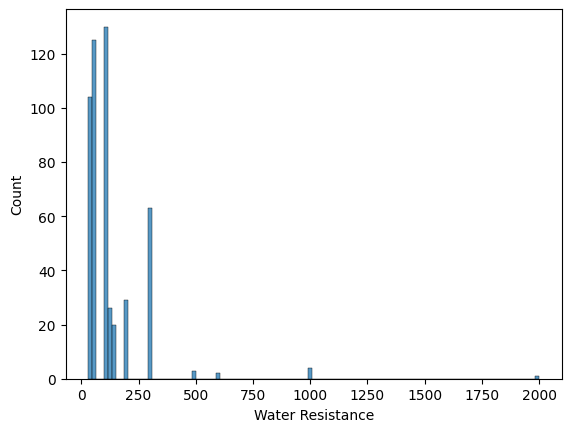

In [102]:
sns.histplot(df["Water Resistance"])

## Group các giá trị có tần suất nhỏ
* Water Resistance >= 500
* Case Diameter <= 35
* Band Width <= 18, Band Width >= 26
* Power Reserve >= 150





In [103]:
df['Water Resistance'].value_counts()

,count
Water Resistance,
100.0,130
50.0,112
30.0,104
300.0,63
200.0,29
120.0,26
150.0,20
60.0,13
1000.0,4


<Axes: xlabel='Water Resistance', ylabel='Count'>

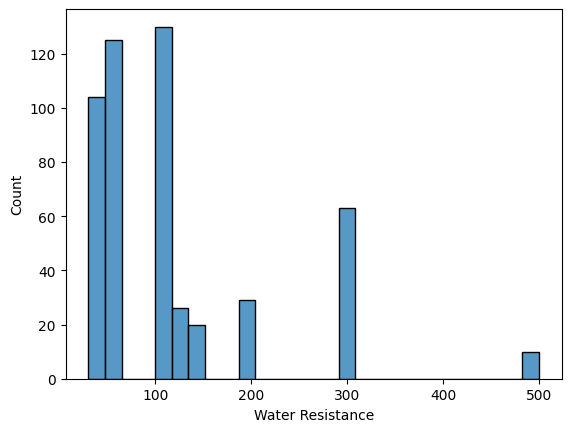

In [104]:
df['Water Resistance'] = df['Water Resistance'].apply(lambda x: 500 if x >= 500 else x)
sns.histplot(df["Water Resistance"])

In [105]:
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score,Brand_encoded,Model_encoded
0,Rolex,Submariner,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,[Date],48.0,9500.0,1,10964.814815,9500.000000
1,Omega,Seamaster,Titanium,Rubber,Automatic,500.0,43.5,14.47,21.0,Blue,Sapphire,[Date],60.0,5800.0,1,5321.739130,5800.000000
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,[Chronograph],42.0,4200.0,3,3613.636364,4200.000000
3,Breitling,Navitimer,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,[Chronograph],70.0,7900.0,3,4693.750000,7900.000000
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,[None],55.0,2800.0,0,6715.789474,2800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,Rose Gold,Leather,Automatic,30.0,38.5,8.25,20.0,White,Sapphire,[Date],38.0,21500.0,1,20696.153846,21658.333333
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300.0,45.0,15.50,23.0,Black,Sapphire,[Date],120.0,13500.0,1,13134.482759,13134.482759
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30.0,38.5,9.70,20.0,Blue,Sapphire,[Date],64.0,1800.0,1,1730.000000,1710.000000
505,Vacheron Constantin,Overseas,Stainless Steel,Steel,Automatic,150.0,41.5,11.00,22.0,Blue,Sapphire,[Date],40.0,19000.0,1,19356.000000,19042.857143


<Axes: xlabel='Case Diameter', ylabel='Count'>

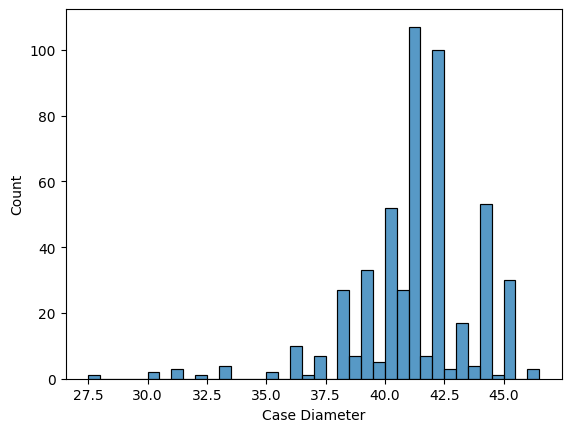

In [106]:
sns.histplot(df["Case Diameter"])

<Axes: xlabel='Case Diameter', ylabel='Count'>

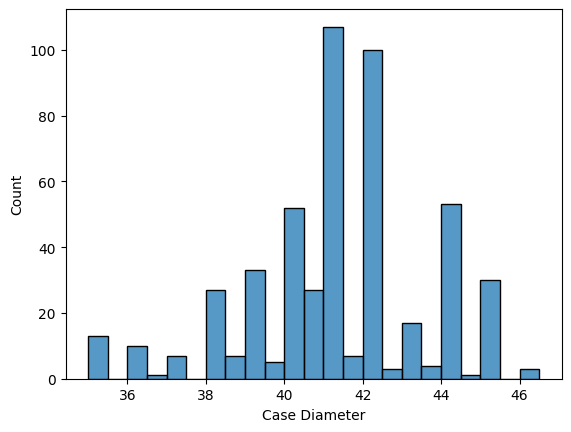

In [107]:
df['Case Diameter'] = df['Case Diameter'].apply(lambda x: 35 if x <= 35 else x)
sns.histplot(df["Case Diameter"])

In [108]:
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score,Brand_encoded,Model_encoded
0,Rolex,Submariner,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,[Date],48.0,9500.0,1,10964.814815,9500.000000
1,Omega,Seamaster,Titanium,Rubber,Automatic,500.0,43.5,14.47,21.0,Blue,Sapphire,[Date],60.0,5800.0,1,5321.739130,5800.000000
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,[Chronograph],42.0,4200.0,3,3613.636364,4200.000000
3,Breitling,Navitimer,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,[Chronograph],70.0,7900.0,3,4693.750000,7900.000000
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,35.0,6.05,20.0,Silver,Sapphire,[None],55.0,2800.0,0,6715.789474,2800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,Rose Gold,Leather,Automatic,30.0,38.5,8.25,20.0,White,Sapphire,[Date],38.0,21500.0,1,20696.153846,21658.333333
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300.0,45.0,15.50,23.0,Black,Sapphire,[Date],120.0,13500.0,1,13134.482759,13134.482759
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30.0,38.5,9.70,20.0,Blue,Sapphire,[Date],64.0,1800.0,1,1730.000000,1710.000000
505,Vacheron Constantin,Overseas,Stainless Steel,Steel,Automatic,150.0,41.5,11.00,22.0,Blue,Sapphire,[Date],40.0,19000.0,1,19356.000000,19042.857143


<Axes: xlabel='Band Width', ylabel='Count'>

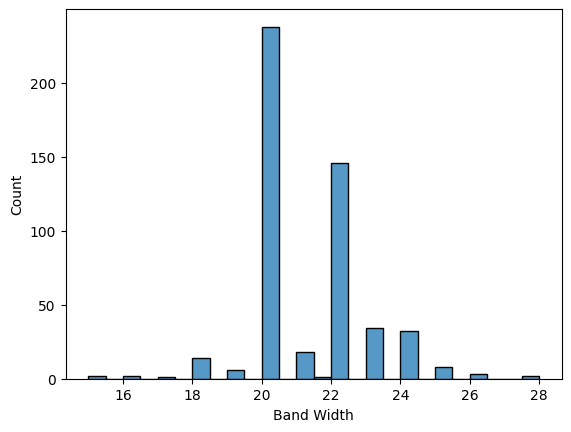

In [109]:
sns.histplot(df["Band Width"])

<Axes: xlabel='Band Width', ylabel='Count'>

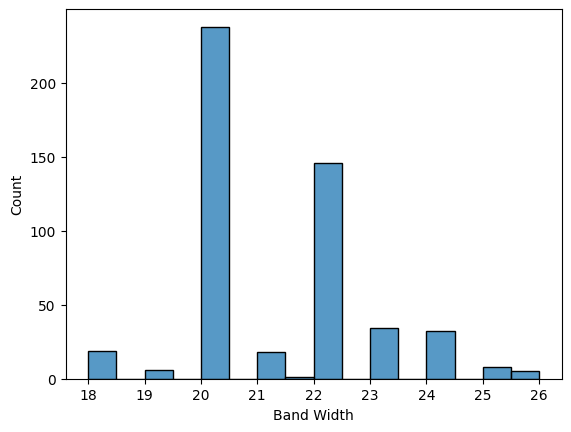

In [110]:
df['Band Width'] = df['Band Width'].apply(lambda x: 18 if x <= 18 else 26 if x >= 26 else x)
sns.histplot(df["Band Width"])

<Axes: xlabel='Power Reserve', ylabel='Count'>

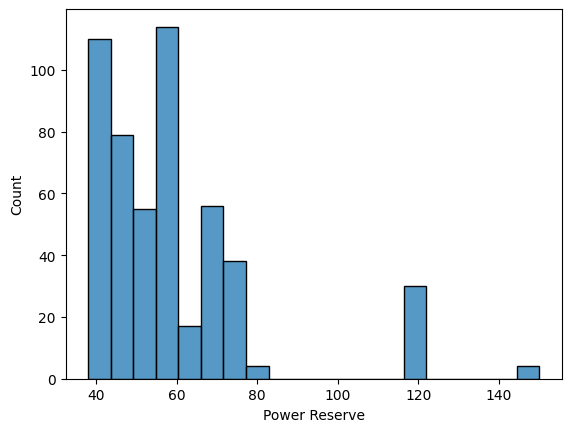

In [111]:
df['Power Reserve'] = df['Power Reserve'].apply(lambda x: 150 if x >= 150 else x)
sns.histplot(df["Power Reserve"])

# Update Saving Preprocessed Data

In [112]:
data = df[cols]
data.to_csv('/content/drive/MyDrive/khdl/luxury_watches_processed_update.csv', index=False)